In [66]:
import pandas as pd
%matplotlib inline

Average method: the forecasts of all future values are equal to the average (or “mean”) of the historical data.

Naïve method: we simply set all forecasts to be the value of the last observation. This method works remarkably well for many economic and financial time series.

Drift method: This is equivalent to drawing a line between the first and last observations, and extrapolating it into the future.

## API Load

In [45]:
import requests

In [46]:
wiki_page = 'Jeopardy!'
start = '20150101'
end = '20190524'

In [47]:
r = requests.get('https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{}/daily/{}/{}'
                 .format(wiki_page,start,end))

In [48]:
json_dump = r.json()['items']

In [49]:
df = pd.DataFrame(json_dump,dtype=)

In [51]:
df = df[['timestamp','views']]

In [58]:
df['timestamp'] = pd.to_datetime(df['timestamp'],format="%Y%m%d%H")

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
df.head()

,timestamp,views
0,2015-07-01,1883
1,2015-07-02,1897
2,2015-07-03,1699
3,2015-07-04,1326
4,2015-07-05,1209


In [63]:
df = df.set_index('timestamp')

## Quick View

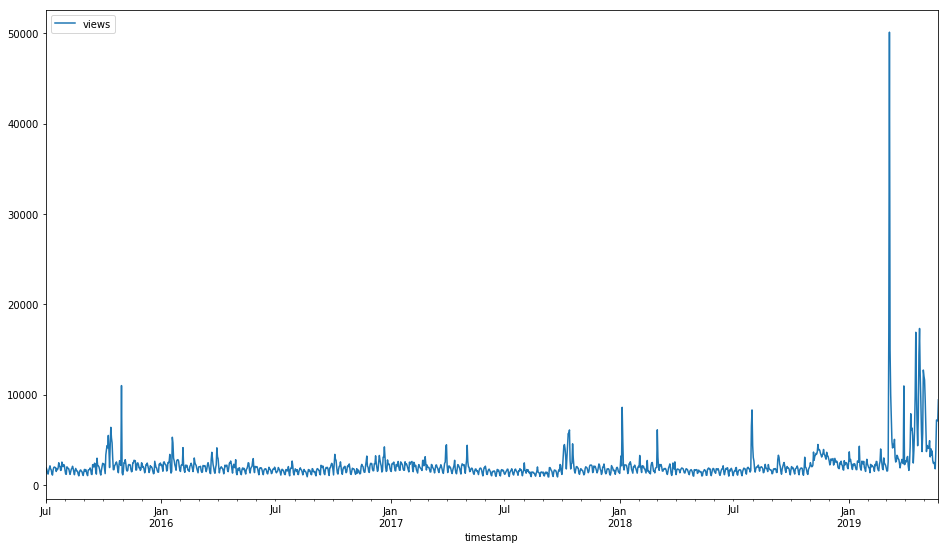

In [68]:
df.plot(figsize=(16,9))

In [76]:
df = df.reindex(pd.date_range(start='2015-07-01',end='2020-05-24'))

### Average method:

In [78]:
df['mean'] = df['views'].mean()

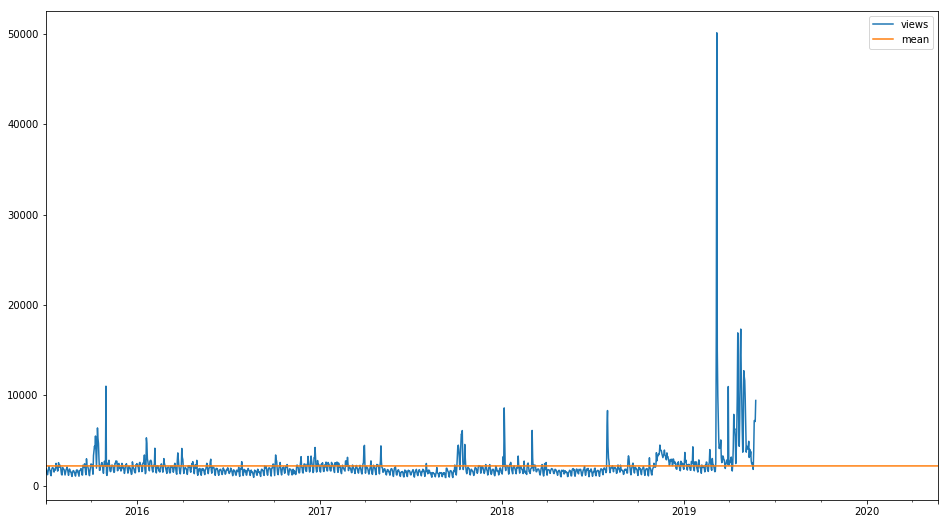

In [80]:
df.plot(figsize=(16,9))

### Naïve method:

In [81]:
df['naive'] = df['views'].shift(1).ffill()

In [82]:
df.head()

,views,mean,naive
2015-07-01,1883.0,2179.734551,NaN
2015-07-02,1897.0,2179.734551,1883.0
2015-07-03,1699.0,2179.734551,1897.0
2015-07-04,1326.0,2179.734551,1699.0
2015-07-05,1209.0,2179.734551,1326.0


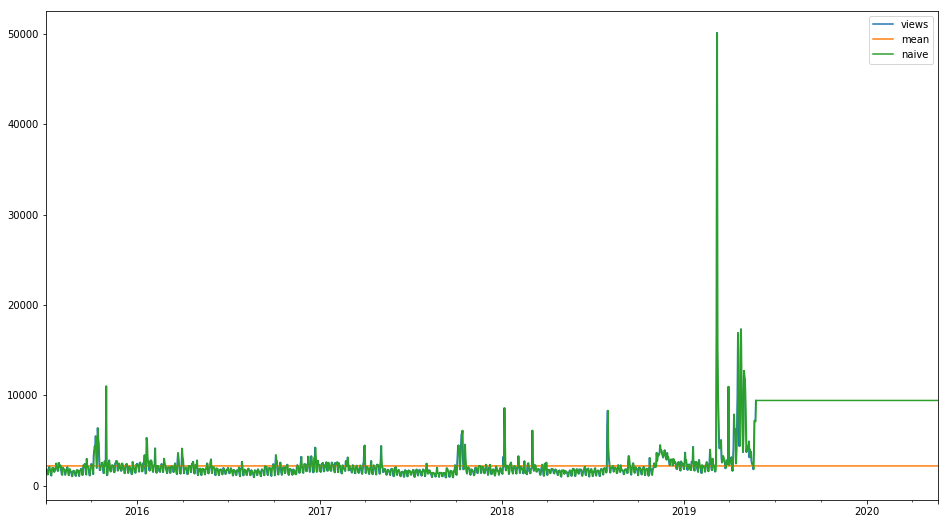

In [83]:
df.plot(figsize=(16,9))

## Prophet

In [84]:
df.head()

,views,mean,naive
2015-07-01,1883.0,2179.734551,NaN
2015-07-02,1897.0,2179.734551,1883.0
2015-07-03,1699.0,2179.734551,1897.0
2015-07-04,1326.0,2179.734551,1699.0
2015-07-05,1209.0,2179.734551,1326.0


In [85]:
df = df.reset_index().rename(columns ={'index':'ds','views':'y'})

In [87]:
from fbprophet import Prophet

In [88]:
model = Prophet()

In [89]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [91]:
future = model.make_future_dataframe(periods=365)

In [94]:
forecast = model.predict(future)

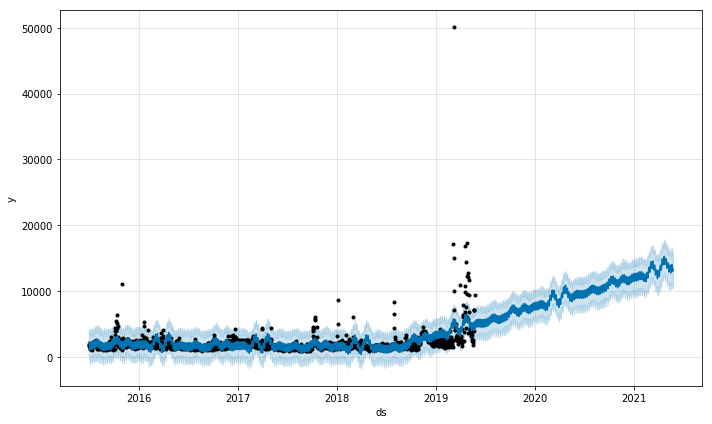

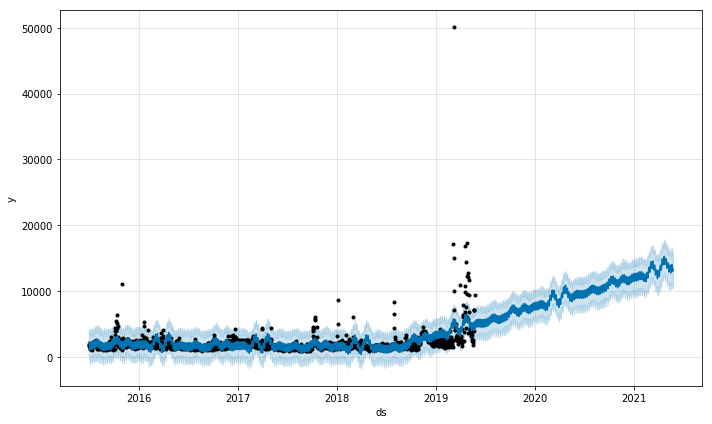

In [97]:
model.plot(forecast)

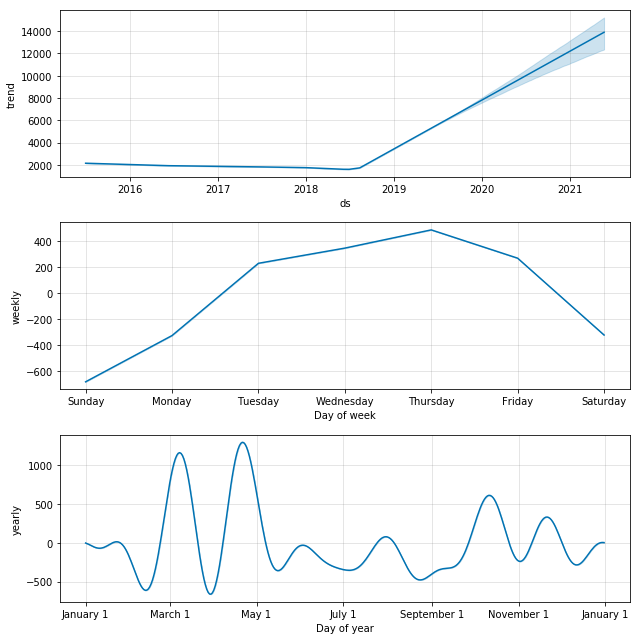

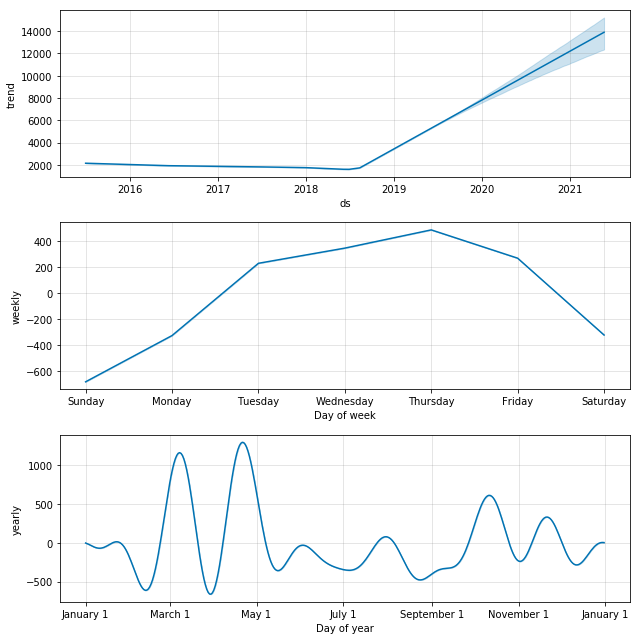

In [98]:
model.plot_components(forecast)